# Basic Neural Network from Scratch 

>## Objective: 

To understand and build a basic one hidden layer Neutral Network from scratch

> ## Approach : 

- **Getting the Dataset**
- **Logistic Regression**
- **Neural Network : Understanding**
     
       - Neural Network structure
       - Activation functions : Softmax and Tanh and their necessity 
       - Weight factors and Bias 
       - Forward Propagation
       - Back Propagation
       - Shape of Vectors
       - Differentiation
       
- **Implementation**

       - Model Function
       - Predict Function
       - Loss Function

- **Varying hidden layer nodes**
- **Conclusion**
     

**Importing Libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

**`Plot_decision_boundary` function is defined to conveniently see the decision boundary**

In [2]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## `1.` Getting the Dataset

Dataset is generated using sklearn's built in methods

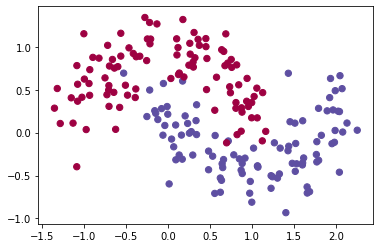

In [3]:
# Generate a dataset and plot it
import sklearn
from sklearn import datasets
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

The dataset generated has two classes, plotted as red and blue points. You can think of the blue dots as male patients and the red dots as female patients, with the x- and y- axis being medical measurements.

Your goal is to train a Machine Learning classifier that predicts the correct class (male or female) given the x- and y- coordinates. Note that the data is not linearly separable, a straight line cant be drawn that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that's one of the major advantages of Neural Networks. You don't need to worry about feature engineering. The hidden layer of a neural network will learn features for you.

## `2.` Logistic Regression: 

To understand the problem better , try to implement a logistic regression first on the dataset and plot the decision boundary using the earlier defined function

**TASK : Build a `logistic regression` model and fit it on the dataset**

In [ ]:
### START CODE HERE (~ 2 Lines of code)

### END CODE

**TASK : Plot the `Decision boundary` using the earlier defined function**

In [ ]:
# For the argument of lambda x: use the predict function of the earlier defined classifier that was fit on dataset

### START CODE HERE (~2 Lines of code)
#(Write code where '#' is given)

plot_decision_boundary(lambda x: '# ')
plt.title("Logistic Regression")

### END CODE

The graph shows the decision boundary learned by our Logistic Regression classifier. It separates the data as good as it can using a straight line, but it's unable to capture the "moon shape" of our data.

## `3.`  Neural Networks : 

### `3.1` Neural Networks Understanding

Let's now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 2. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. (Because we only have 2 classes we could actually get away with only one output node predicting 0 or 1, but having 2 makes it easier to extend the network to more classes later on). The input to the network will be x- and y- coordinates and its output will be two probabilities, one for class 0 ("female") and one for class 1 ("male"). It looks something like this:

<img src="https://i.stack.imgur.com/iHDtO.png">

You can choose the dimensionality (the number of nodes) of the hidden layer. The more nodes we put into the hidden layer the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means that the model become more prone to overfitting the data.

How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. Its best to play with the number of nodes in the hidden layer and see how it affects the output.

You also need to pick an activation function for the hidden layer. The activation function transforms the inputs of the layer into its outputs.  Common chocies for activation functions are tanh, the sigmoid function, or ReLUs. Here you'll use tanh, which performs quite well in many scenarios. A nice property of these functions is that their derivate can be computed using the original function value. For example, the derivative of $\tanh x$ is $1-\tanh^2 x$. This is useful because it allows to compute $\tanh x$ once and re-use its value later on to get the derivative.

The network is desired to output probabilities thus the activation function for the output layer will be the softmax, which is simply a way to convert raw scores to probabilities. If you're familiar with the logistic function you can think of softmax as its generalization to multiple classes.

### `3.2` Activation Functions 

**Softmax :**
<img src="https://miro.medium.com/max/1812/1*670CdxchunD-yAuUWdI7Bw.png" widht="500" height="500">

Where the function is defined as : 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSzssj62d-Ke7FH24hbFPlkQVrl9cnkoYSaSs-As9bA9k5LgdFf&usqp=CAU">

**Tanh :**
<img src="https://machinelearningblogcom.files.wordpress.com/2017/11/bildschirmfoto-2017-11-10-um-12-20-57.png?w=428&h=237">

**Why are Activation Functions necessary?**

If there were no activation function or just linear activation function then it would work same as a linear classifier/regressor and the models applications would be very limited and thus a nonlinear activation function is what really allows to fit nonlinear hypotheses.

**Understanding the network**

The input $x$ contains two attributes namely $x1$ and $x2$ and has $m$ number of training examples , in this dataset $m$ = 200. 
Neural networks are similar to logistic regression just that the latter is used for binary classification/regression and the former is used for multiclass classification/regression. Think of it this way that In logistic regression , attributes or inputs are given to a box or a node which multiplies the inputs with weight factors , adds bias and outputs the resultant similar to linear regression which is then transformed by a non linear activtion function , sigmoid in logistic regression to give the final output. Similarly , In neural networks this whole process happens alot of times , in this notebook with just one hidden layer the whole process occurs as many times as the number of nodes in the hidden layer , so each node's input-output can be visualised as logistic regression and many such singluar logistic regression units give birth to neural networks which shows generally why neural networks perform better than its singular counterpart. This whole process can be explained better with the following image :
<img src="https://www.cntk.ai/jup/cntk103b_TwoFormsOfLR-v3.png">

### `3.3` Weight factors and Bias

**Bias** : The term bias is used to adjust the final output matrix as the y-intercept does. For instance, in the classic equation, $y = mx + c$, if $c$ = 0, then the line will always pass through 0. Adding the bias term provides more flexibility and better generalisation to our Neural Network model.

**Weight Factors** : Weight factors gives out the best linear combinations of attributes which would give the closest ouput

Weight factors and Bias values are first randomly given and then adjusted through `Back Propaagtion` and `Gradient Descent` to find the optimum combination

### `3.4` Forward Propagation : How the network makes predictions

The network makes predictions using forward propagation, which is just a bunch of matrix multiplications and the application of the activation function(s) as defined above. If $x$ is the 2-dimensional input to the network then predictions $\hat{y}$ (also two-dimensional) can be calculated as follows:

$$
\begin{aligned}
z_1 = xW_1 + b_1 \\ 
a_1 = \tanh(z_1) \\
z_2 = a_1W_2 + b_2 \\
a_2 = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

$z_i$ is the weighted sum of inputs of layer $i$ (bias included) so $z_1$ contains all the outputs from all the nodes in the first hidden layer so  $z_1[1]$ will be the output of first node of hidden layer , $z_1[2]$ the output of second node of hidden layer and so on. $a_i$ is the output of layer $i$ after applying the activation function, it forms a vector similar to $z_i$ and the values are tranformed from $z_i$ using an activation function.\
$W_1, b_1, W_2, b_2$ are parameters of the network, which are needed to learn from the training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above you can figure out the dimensionality of these matrices. If 500 nodes are used for the hidden layer then $W_1 \in \mathbb{R}^{2\times500}$, $b_1 \in \mathbb{R}^{500}$, $W_2 \in \mathbb{R}^{500\times2}$, $b_2 \in \mathbb{R}^{2}$. Now you see why you'll have more parameters if we increase the size of the hidden layer.

### `3.5` Shapes of all the Vectors

Understand that all the variables like weight factors, bias , input x etc are all vectors. Vectorization is done to ease out processes like element wise multiplication and then its summation which would generally require a for loop but with a vectorization a simple dot product would suffice thus increasing the speed and also conveneient and short to code. 
With neural networks , understanding the shapes of all the parameters is very important so lets look at the shapes :

Here , number of training examples are $m$=200 and **n_hid** is the number of nodes in hidden layer
1. $X$ has a shape of `(m,2)` : 2 is for the number of attributes i.e $x_1$ and $x_2$ 
2. $W_1$ has a shape of `(2,n_hid)` connecting each node of input layer and hidden layer and giving them weights : 2 is for the number of attributes i.e $x_1$ and $x_2$ 
3. $b_1$ has a shape of `(1,n_hid)` as there is one bias for each node in the hidden layer 
4. $W_2$ has a shape of `(n_hid,2)` connecting each node from hidden layer to the output layer of 2 : 2 is for the output layer giving probabilities of `male` and `female`
5. $b_2$ has a shape of `(1,2)` as there is one bias for each node in the output layer thus 2 for 2 nodes (`male` and `female` probabilities) 
6. $z_1$ has a shape of `(1,n_hid)` as it gives one output for each node and it does that $m$ such instances
7. $a_1$ has a shape of `(1,n_hid)` same as $z_1$ as only values inside are changed and not the shape
8. $ \hat{y}$ has a shape of `(1,2)` as its the final output and it has 2 probability values for each of **m** instances

### `3.6` Back Propagation : Learning the Parameters 

Learning the parameters for the network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on the training data. But how to define the error? Especially for that a function that measures our error the loss function is called. Negative log neighbourhood would be used here . If you have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
H(y,p) = - \sum_i y_i log(p_i)
\end{aligned}
$$
The formula looks complicated, but all it really does is sum over our training examples and the $p_{i}$ are the probabilities of the correct classes. So, the further away $y$ (the correct labels) and $\hat{y}$ (our predictions) are, the greater the loss will be. **Understand that if $p_{i}$ is the probability of the correct classes then $\hat{y}$ will always be equal to one. So this would be just summation of negative log of probabilities of the correct classes.**

Remember that the goal is to find the parameters that minimize the loss function. You can use gradient descent to find its minimum. Here the most basic version of Gradient Descent, also called batch gradient descent with a fixed learning rate is implemented.  Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also decay the learning rate over time but for now you can use this. 

As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to the parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients following formulas can be used, 

Applying the backpropagation formula ,the following results are obtained :

$$
\begin{aligned}
\delta_3 = \hat{y} - y \\
\delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
\frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
\frac{\partial{L}}{\partial{b_2}} = \delta_3\\
\frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
\frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

$T$ signifies transpose of that matrix/vector. 
**NOTE : in $\delta_3$ , $y$ would always be equal to 1 if $\hat{y}$ are the probabilities of the correct classes. So in the code its better to find the probabilities of the right classes and then subtract it by 1** 
A More in-depth and better understanding can be given [here](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/)

### `3.7` Differentiations :

The Softmax differentiation with the cross entropy loss can be given as : 

$$
\begin{align}
L &= - \sum_i y_i log(p_i) \\
\frac{\partial L}{\partial o_i} &= - \sum_k y_k \frac{\partial log(p_k)}{\partial o_i } \\
&= - \sum_k y_k \frac{\partial log(p_k)}{\partial p_k} \times \frac{\partial p_k}{ \partial o_i} \\
&= - \sum y_k \frac{1}{p_k} \times \frac{\partial p_k}{\partial o_i} \\
\end{align}
$$

With the softmax derivative : 

$$
\begin{align}
\frac{\partial L}{\partial o_i}  &= -y_i(1-p_i) - \sum_{k\neq i} y_k \frac{1}{p_k}(-p_k.p_i) \\
&= -y_i(1-p_i) + \sum_{k \neq 1} y_k.p_i \\
&= - y_i + y_ip_i + \sum_{k \neq 1} y_k.p_i \\
&= p_i\left( y_i +  \sum_{k \neq 1} y_k\right) - y_i \\
&= p_i\left( y_i +  \sum_{k \neq 1} y_k\right)  - y_i
\end{align}
$$

$y$ is a one hot encoded vector for the labels, so $\sum_k y_k = 1$ and $y_i +  \sum_{k \neq 1} y_k = 1$ , Thus simplifying it into :\

$\frac{\partial L}{\partial o_i} = p_i - y_i$ which is the same as $\delta_3 = p_i - y_i$

A much more intensive and indepth explanation can be provided [here](https://deepnotes.io/softmax-crossentropy) and [here](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/)

**Forward and backward propagation can be understood with the help of following schematics** 

**For single node :**

<img src="https://i.stack.imgur.com/WWJRk.png" width="500" height="500">

**For multiple :**

<img src="https://miro.medium.com/max/6216/1*6q2Rgd8W9DoCN9Wfwc_9gw.png" width="500" height="500">

**These derivatives are calculated , multiplied by learning rate and then added to the weights so as these gradients tend to zero that is error is minimum, the final optimum weights are obtained**

**IMPORTANT** : In the following section the terms $dW1$ , $dW2$ , $db1$ ... etc are short forms of $\frac{\partial{L}}{\partial{W_1}}$ ,  $\frac{\partial{L}}{\partial{W_2}}$ , $\frac{\partial{L}}{\partial{b_1}}$ ... respectively and always assume the same for other gradient parameters also

## `4.` Implementation : 

Now , that a proper understanding of neural networks has been obtained , its time to make a model implementing it

**Pre defining constant parameters**

In [ ]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


### `4.1` Model function

**TASK : Build a function to implement the Neural Network**

In [ ]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations

# One completion of forward and backward pass happens in one pass and you'll be using 20000 such passes

### START CODE HERE : (Write code where '#' is given)

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. 
    # With succesive gradient descents , the model will learn and will keep updating the parameters 
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    
    # Weights are divided by square root of dimensions to somehow normalise the weights and not have very high values
    # Seeing the earlier definition , define 'W2' and 'b2' in the same way 
    # Take help of the earlier section where shapes are defined
    W2 = '#'
    # Understand that while weight factors cant be randomly assigned to zeros , however biases can. 
    b2 = '#'

    # This is the model to return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        ## FORWARD PROPAGATION
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        
        ## Seeing the earlier definition , define 'z2' and find 'probs' using softmax activation instead of tanh
        ## Take help of the section where forward propagation formulas are defined
        z2 = '#'
        exp_scores = '#'
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        ## BACK PROPAGATION
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        #keepdims =True keeps the earlier vectors dimensions which is very important
        
        ## Seeing the earlier definitions , define 'delta2' ,'dW1' ,'db1'
        ## Take help of the backward propagation formulas defined in the earlier sections 
        
        delta2 = '#'
        dW1 = '#'
        db1 = '#'

        # Regularisation terms are added (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        
        ## Seeing the earlier definitions , define 'W2' , 'b2'
        ## Understand how parameters are updated , epsilon is the contant learning rate 
        W2 = '#'
        b2 = '#'
        
        # Assigning new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so don't want to do it too often.
        if print_loss and i % 1000 == 0:
             print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Now , The neural network is made which takes in input `nn_hdim` which is the number of nodes in hidden layer and returns the model keeping in mind the input and output parameters. The approach of this was to first randomly assign the parameters and with gradient descent , update it until it reaches the minimum.

Once model is made , its essential to make a `predict` function to predict the models outputs and then a `calculate_loss` function that calculates the loss between $\hat{y}$ and $y$

### `4.2` Predict function : 

**TASK : Make a function `Predict` that takes in model and X as arguments and returns the maximum probabilities**

In [ ]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    
### START CODE HERE (Write code where '#' is given)
   
     # FORWARD PROPAGATION
    ## Write the full steps of forward propagration as before using the updated parameters  
    z1 = '#'
    a1 = '#'
    z2 = '#'
    exp_scores = '#'
    probs = '#'
    
### END CODE
    return np.argmax(probs, axis=1)
# The maximum probabilites are returned

A good schematic to understand why the function returns the maximum probability is given below :
<img src="https://i.imgur.com/hU252jE.jpg">

Now , that the output probabilites are calculated , The last step remaining is to calculate the loss between $\hat{y}$ and $y$ using `cross-entropy` function
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQediZV_J9oWckQU6SMM1bwIJUF05pYb3QJQQhJ3t3YoFcax5Ve&usqp=CAU">

**Remember it can also be written as summation of negative log of the correct class probabilities which will be implemented in the code**

### `4.3` Loss function: 

**TASK : Make function to calculate loss between $\hat{y}$ and $y$**

In [ ]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    
    ### START CODE HERE : (Write code where '#' is given) 
    
    ## Take parameters 'W1','b1','W2','b2' from 'model'
    ## Take help from the previously defined functions to understand how it can be done
    
    W1, b1, W2, b2 = '#'
    
    # Forward propagation to calculate our predictions
    ## Note : you can also use previously defined function predict instead
    
    # Write code to get all the parameters using forward propagation formulas
    z1 = '#'
    a1 = '#'
    z2 = '#'
    exp_scores = '#'
    probs = '#'
    
    ## Calculating the loss 
    corect_logprobs = -np.log(probs['#', '#'])
    ## Remember the arguments are such that probs[,] gives out probabilities of correct classes similar to p_i in delta3 formula
    data_loss = np.sum(corect_logprobs)
    
    # Adding regulatization term to loss (optional)
    
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

### END CODE 

**Now that all the helper functions and model functions are made its time to implement it**

**TASK : Using `build_model` function, take `nn_hdim=3` and `print_loss=True` and get the model in a variable called `model`** 

In [ ]:
# Build a model with a 3-dimensional hidden layer
### START CODE HERE (~ 1 Line of code)

### END CODE HERE 


**TASK : Plot the decision boundary using `plot_decision_boundary` function**

In [ ]:
# Plot the decision boundary
### START CODE HERE (~ 2 Lines of code)

## See the plot_decision_boundary implementation in logistic regression and write the arguments similarly
## Use predict function in lambda x : argument 
## Give title to the plot 


### END CODE HERE

## `5.` Varying the hidden layer size

In the example above you made a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.

**TASK : Using a `for_loop` and the functions build above. make models and plot decision boundaries of varying hidden layer sizes**

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    ### START CODE HERE (FULL CODE)
    
    ## Use plt.subplots and plt.title to form subplots of different nn_hdim and give them title accordingly
    ## Make model using build_model and make plot decision boundary using plot_decision_boundary and predict functions
plt.show()

    ### END CODE

## `6.` Conclusion 

After trying out different activation functions with different sizes of hidden layer ,get an idea of why alot of nodes cant be used in a single hidden layer and which activation functions work best . Based on this , make the adjustments and choose the best final model 